---

# Statistical Modeling and Resampling

This notebook covers detailed explanations, manual calculations, plots, and example problem statements for key concepts in statistical modeling and resampling.

## 📍 7. Statistical Modeling and Resampling

### Resampling Methods

Resampling methods are powerful techniques that involve repeatedly drawing samples from a dataset and fitting a model (or calculating a statistic) on these samples. They are primarily used for:
1.  **Estimating the precision of sample statistics** (e.g., standard errors, confidence intervals).
2.  **Validating models** by evaluating their performance on unseen data.

#### 7.1. Bootstrapping

**Explanation:**
Bootstrapping is a non-parametric resampling technique used to estimate the sampling distribution of a statistic by repeatedly re-sampling with replacement from the *observed* dataset. It's particularly useful when the theoretical distribution of a statistic is unknown or difficult to derive, or when assumptions required for analytical methods (like normality) are not met.

The core idea is that the observed sample can be treated as a proxy for the entire population. By drawing many "bootstrap samples" from this observed sample (with replacement), we can simulate the process of drawing samples from the actual population.

**Steps for Bootstrapping:**
1.  **Original Sample:** Start with your original dataset of $N$ observations.
2.  **Bootstrap Samples:** Create a large number ($B$, typically 1,000 to 10,000) of new samples, called "bootstrap samples." Each bootstrap sample is created by randomly drawing $N$ observations *with replacement* from your original sample. This means some observations might appear multiple times in a bootstrap sample, while others might not appear at all.
3.  **Calculate Statistic:** For each bootstrap sample, calculate the statistic of interest (e.g., mean, median, standard deviation, regression coefficient, correlation).
4.  **Bootstrap Distribution:** The collection of these $B$ calculated statistics forms the "bootstrap distribution" of your statistic.
5.  **Inference:** Use this bootstrap distribution to estimate the standard error of the statistic, construct confidence intervals, or perform hypothesis tests.

**Why use it?**
* Estimates standard errors and confidence intervals for complex statistics where analytical formulas are unavailable (e.g., median, quantiles, specific regression coefficients in complex models).
* Does not require assumptions about the underlying population distribution (non-parametric).

---

#### Example Problem Statement: Estimating Confidence Interval for Median Income

A small startup has collected income data from its first 10 employees (in lakhs INR per annum):
`[7, 8, 9, 10, 11, 12, 13, 14, 15, 60]`

The founder wants to know the **median income** and a **90% confidence interval** for this median. The outlier (60 lakhs) makes the mean sensitive, and the small sample size might violate assumptions for standard parametric methods to estimate the median's confidence interval. Bootstrapping is a good fit.

**Manual Calculation (Conceptual & Simplified for 3 Bootstrap Samples):**

Original Data (N=10): `[7, 8, 9, 10, 11, 12, 13, 14, 15, 60]`
True Median of Original Data: Sorting gives `[7, 8, 9, 10, 11, 12, 13, 14, 15, 60]`. Median = $(11+12)/2 = 11.5$.

Let's manually perform 3 bootstrap samples (in reality, you'd do 1000s):

* **Bootstrap Sample 1:** (drawing 10 values with replacement)
    Suppose we draw: `[10, 7, 60, 12, 10, 15, 7, 14, 11, 13]`
    Sorted: `[7, 7, 10, 10, 11, 12, 13, 14, 15, 60]`
    Median of Sample 1: $(11+12)/2 = \mathbf{11.5}$

* **Bootstrap Sample 2:**
    Suppose we draw: `[8, 15, 9, 14, 12, 12, 10, 60, 8, 11]`
    Sorted: `[8, 8, 9, 10, 11, 12, 12, 14, 15, 60]`
    Median of Sample 2: $(11+12)/2 = \mathbf{11.5}$

* **Bootstrap Sample 3:**
    Suppose we draw: `[7, 7, 8, 9, 10, 11, 12, 13, 14, 15]` (note: 60 was not drawn in this sample)
    Sorted: `[7, 7, 8, 9, 10, 11, 12, 13, 14, 15]`
    Median of Sample 3: $(10+11)/2 = \mathbf{10.5}$

After many (e.g., 1000) such samples, you would have 1000 median values. To find the 90% confidence interval, you'd sort these 1000 medians and find the values at the 5th percentile and 95th percentile.


**Python Code for Bootstrapping & Plot:**

--- Bootstrapping Example: Median Income Confidence Interval ---
Original Data: [ 7  8  9 10 11 12 13 14 15 60]
Median of Original Data: 11.50

Bootstrap Statistics (from 5000 samples):
Mean of Bootstrap Medians: 11.58
Standard Error of Median (Bootstrap): 1.90
90% Confidence Interval for Median: (9.00, 14.00)


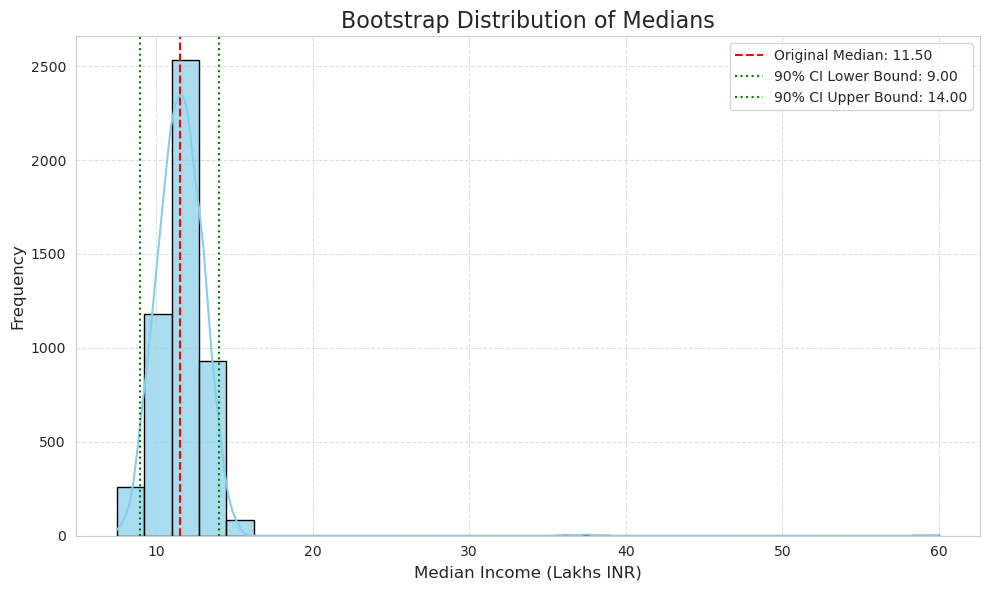

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] # Default font

print("--- Bootstrapping Example: Median Income Confidence Interval ---")

# Original Data
original_data = np.array([7, 8, 9, 10, 11, 12, 13, 14, 15, 60])
original_median = np.median(original_data)
print(f"Original Data: {original_data}")
print(f"Median of Original Data: {original_median:.2f}")

# Number of bootstrap samples
num_bootstraps = 5000

# Store bootstrap medians
bootstrap_medians = []

# Perform bootstrapping
np.random.seed(42) # for reproducibility
for _ in range(num_bootstraps):
    # Draw N samples with replacement from the original data
    bootstrap_sample = np.random.choice(original_data, size=len(original_data), replace=True)
    # Calculate the median of the bootstrap sample
    bootstrap_median = np.median(bootstrap_sample)
    bootstrap_medians.append(bootstrap_median)

bootstrap_medians = np.array(bootstrap_medians)

# Calculate 90% Confidence Interval
lower_bound = np.percentile(bootstrap_medians, 5)
upper_bound = np.percentile(bootstrap_medians, 95)

print(f"\nBootstrap Statistics (from {num_bootstraps} samples):")
print(f"Mean of Bootstrap Medians: {np.mean(bootstrap_medians):.2f}")
print(f"Standard Error of Median (Bootstrap): {np.std(bootstrap_medians):.2f}")
print(f"90% Confidence Interval for Median: ({lower_bound:.2f}, {upper_bound:.2f})")

# Plotting the Bootstrap Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_medians, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(original_median, color='red', linestyle='--', label=f'Original Median: {original_median:.2f}')
plt.axvline(lower_bound, color='green', linestyle=':', label=f'90% CI Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle=':', label=f'90% CI Upper Bound: {upper_bound:.2f}')
plt.title('Bootstrap Distribution of Medians', fontsize=16)
plt.xlabel('Median Income (Lakhs INR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Interpretation of Bootstrapping Plot:**
The histogram shows the distribution of the median values obtained from thousands of bootstrap samples. This distribution approximates the true sampling distribution of the median. The red dashed line marks the median of the original dataset. The green dotted lines mark the 5th and 95th percentiles of the bootstrap distribution, forming the 90% confidence interval. This visual allows us to understand the variability and uncertainty around our median estimate.

-----

#### 7.2. Cross-validation

**Explanation:**
Cross-validation is a technique used to assess how well a statistical model will generalize to an independent dataset. It's crucial for evaluating model performance and preventing overfitting, especially when you have limited data. The fundamental idea is to split the dataset into multiple subsets, train the model on some subsets, and evaluate it on the remaining (unseen) subset.

**Common Types of Cross-validation:**

1.  **K-Fold Cross-validation:**

      * The data is randomly divided into $K$ equally sized folds (subsets).
      * The model is trained $K$ times. In each iteration:
          * One fold is used as the **test set**.
          * The remaining $K-1$ folds are combined to form the **training set**.
      * The performance metric (e.g., accuracy, MSE) is recorded for each of the $K$ iterations.
      * The final performance is the average of the $K$ recorded metrics.
      * **Pros:** Good balance between bias and variance, uses all data for training and testing.
      * **Cons:** Can be computationally intensive for large $K$.

2.  **Leave-One-Out Cross-validation (LOOCV):**

      * A special case of K-Fold where $K=N$ (the number of observations).
      * In each iteration, one observation is used as the test set, and the remaining $N-1$ observations are used for training.
      * **Pros:** Maximizes the amount of data used for training in each fold, results in a low bias estimate.
      * **Cons:** Very computationally expensive for large datasets; high variance in the performance estimates.

3.  **Stratified K-Fold Cross-validation:**

      * Used primarily for classification problems when dealing with imbalanced datasets.
      * Ensures that each fold maintains the same proportion of target class labels as the original dataset. This prevents a fold from having too few (or zero) instances of a minority class.

**Why use it?**

  * Provides a more robust and realistic estimate of a model's performance on unseen data compared to a single train-test split.
  * Helps detect and mitigate overfitting (when a model performs well on training data but poorly on new data).
  * Useful for hyperparameter tuning.

-----

#### Example Problem Statement: Evaluating a Simple Linear Regression Model

A small online store wants to predict daily sales (in thousands INR) based on daily advertising spend (in hundreds INR). They have 6 days of data:

| Ad Spend (X) | Sales (Y) |
| :----------- | :-------- |
| 1            | 2         |
| 2            | 3         |
| 3            | 4         |
| 4            | 4.5       |
| 5            | 5.5       |
| 6            | 6         |

They want to evaluate a simple linear regression model using **3-Fold Cross-validation** to estimate its average performance (using Mean Squared Error - MSE).

**Manual Calculation (for 3-Fold Cross-validation):**

Original Data (N=6):
$X = [1, 2, 3, 4, 5, 6]$
$Y = [2, 3, 4, 4.5, 5.5, 6]$

Let's divide the data into 3 folds:

  * **Fold 1:** (1, 2), (2, 3)
  * **Fold 2:** (3, 4), (4, 4.5)
  * **Fold 3:** (5, 5.5), (6, 6)

**Iteration 1:**

  * **Test Set:** Fold 1 `[(1, 2), (2, 3)]`
  * **Training Set:** Fold 2 + Fold 3 `[(3, 4), (4, 4.5), (5, 5.5), (6, 6)]`
  * **Train Model:** Fit $Y = \\beta\_0 + \\beta\_1 X$ on Training Set.
    (Using Python/calculator, for this training set: $\\beta\_0 \\approx 1.5$, $\\beta\_1 \\approx 0.75$)
    So, $Y\_{pred} = 1.5 + 0.75X$
  * **Evaluate on Test Set:**
      * For $(1, 2)$: $Y\_{pred} = 1.5 + 0.75(1) = 2.25$. Squared Error = $(2 - 2.25)^2 = 0.0625$
      * For $(2, 3)$: $Y\_{pred} = 1.5 + 0.75(2) = 3.00$. Squared Error = $(3 - 3.00)^2 = 0.0000$
      * MSE for Iteration 1 = $(0.0625 + 0.0000) / 2 = \\mathbf{0.03125}$

**Iteration 2:**

  * **Test Set:** Fold 2 `[(3, 4), (4, 4.5)]`
  * **Training Set:** Fold 1 + Fold 3 `[(1, 2), (2, 3), (5, 5.5), (6, 6)]`
  * **Train Model:** Fit $Y = \\beta\_0 + \\beta\_1 X$ on Training Set.
    (For this training set: $\\beta\_0 \\approx 1.2$, $\\beta\_1 \\approx 0.8$)
    So, $Y\_{pred} = 1.2 + 0.8X$
  * **Evaluate on Test Set:**
      * For $(3, 4)$: $Y\_{pred} = 1.2 + 0.8(3) = 3.6$. Squared Error = $(4 - 3.6)^2 = 0.16$
      * For $(4, 4.5)$: $Y\_{pred} = 1.2 + 0.8(4) = 4.4$. Squared Error = $(4.5 - 4.4)^2 = 0.01$
      * MSE for Iteration 2 = $(0.16 + 0.01) / 2 = \\mathbf{0.085}$

**Iteration 3:**

  * **Test Set:** Fold 3 `[(5, 5.5), (6, 6)]`
  * **Training Set:** Fold 1 + Fold 2 `[(1, 2), (2, 3), (3, 4), (4, 4.5)]`
  * **Train Model:** Fit $Y = \\beta\_0 + \\beta\_1 X$ on Training Set.
    (For this training set: $\\beta\_0 \\approx 1.0$, $\\beta\_1 \\approx 0.8$)
    So, $Y\_{pred} = 1.0 + 0.8X$
  * **Evaluate on Test Set:**
      * For $(5, 5.5)$: $Y\_{pred} = 1.0 + 0.8(5) = 5.0$. Squared Error = $(5.5 - 5.0)^2 = 0.25$
      * For $(6, 6)$: $Y\_{pred} = 1.0 + 0.8(6) = 5.8$. Squared Error = $(6 - 5.8)^2 = 0.04$
      * MSE for Iteration 3 = $(0.25 + 0.04) / 2 = \\mathbf{0.145}$

**Average MSE (Estimated Generalization Error):**
Average MSE = $(0.03125 + 0.085 + 0.145) / 3 = \\mathbf{0.087}$


**Python Code for Cross-validation & Plot:**

--- K-Fold Cross-Validation Example ---
Original X: [1 2 3 4 5 6]
Original y: [2.  3.  4.  4.5 5.5 6. ]

Fold 1:
  Train Indices: [2 3 4 5]
  Test Indices: [0 1]
  Test MSE: 0.1825

Fold 2:
  Train Indices: [0 1 3 4]
  Test Indices: [2 5]
  Test MSE: 0.0763

Fold 3:
  Train Indices: [0 1 2 5]
  Test Indices: [3 4]
  Test MSE: 0.0166

Average MSE across all folds: 0.0918


C:\Users\sangouda\AppData\Local\Temp\ipykernel_51524\1559326093.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=folds, y=mses, palette='viridis', edgecolor='black')


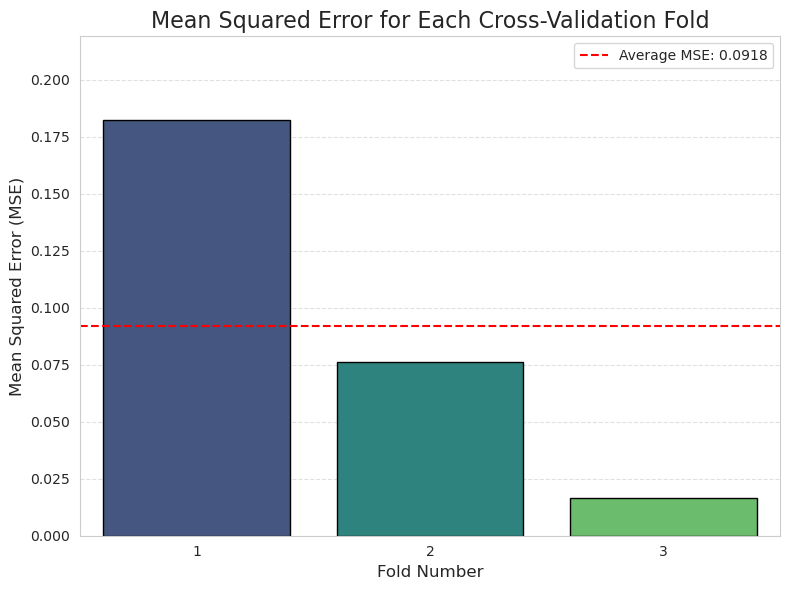

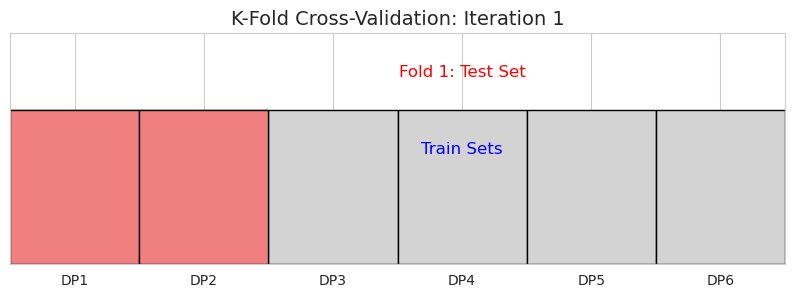

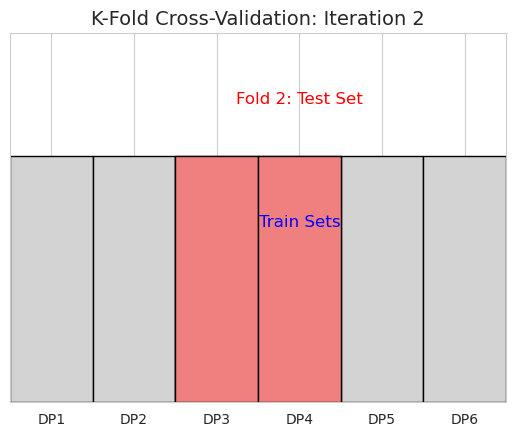

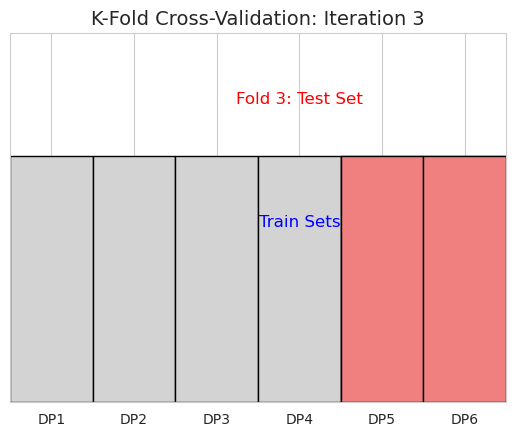

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("--- K-Fold Cross-Validation Example ---")

# Original Data
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1) # Ad Spend
y = np.array([2, 3, 4, 4.5, 5.5, 6]) # Sales

print(f"Original X: {X.flatten()}")
print(f"Original y: {y}\n")

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42) # 3 folds, shuffle for randomness

mse_scores = []
fold_info = []

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    fold_info.append({
        'fold': fold + 1,
        'train_indices': train_index,
        'test_indices': test_index,
        'test_mse': mse
    })

    print(f"Fold {fold + 1}:")
    print(f"  Train Indices: {train_index}")
    print(f"  Test Indices: {test_index}")
    print(f"  Test MSE: {mse:.4f}\n")

average_mse = np.mean(mse_scores)
print(f"Average MSE across all folds: {average_mse:.4f}")

# --- Plotting Cross-Validation Performance ---
folds = [f['fold'] for f in fold_info]
mses = [f['test_mse'] for f in fold_info]

plt.figure(figsize=(8, 6))
sns.barplot(x=folds, y=mses, palette='viridis', edgecolor='black')
plt.axhline(average_mse, color='red', linestyle='--', label=f'Average MSE: {average_mse:.4f}')
plt.title('Mean Squared Error for Each Cross-Validation Fold', fontsize=16)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.ylim(0, max(mses) * 1.2) # Adjust y-axis limit
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Conceptual Plot of K-Fold Splits (manual illustration)
plt.figure(figsize=(10, 3))
num_data_points = len(X)
num_folds = 3
fold_size = num_data_points // num_folds

for i in range(num_folds):
    test_start = i * fold_size
    test_end = (i + 1) * fold_size
    
    # Represent data points
    plt.bar(range(num_data_points), [1]*num_data_points, color='lightgrey', edgecolor='black', width=1)
    
    # Highlight test fold
    for j in range(test_start, test_end):
        plt.bar(j, 1, color='lightcoral', edgecolor='black', width=1)
    
    plt.text(num_data_points / 2, 1.2, f'Fold {i+1}: Test Set', ha='center', va='bottom', fontsize=12, color='red')
    plt.text(num_data_points / 2, 0.7, 'Train Sets', ha='center', va='bottom', fontsize=12, color='blue')
    
    plt.xticks(np.arange(num_data_points), labels=[f'DP{k+1}' for k in range(num_data_points)])
    plt.yticks([])
    plt.xlim(-0.5, num_data_points - 0.5)
    plt.ylim(0, 1.5)
    plt.title(f'K-Fold Cross-Validation: Iteration {i+1}', fontsize=14)
    plt.show()

**Interpretation of Cross-validation Plots:**

  * **Bar Plot of MSEs:** This plot shows the Mean Squared Error for each fold during cross-validation. It helps visualize the variability of model performance across different splits of the data. The red dashed line indicates the average MSE, which is the most robust estimate of the model's generalization performance.
  * **Conceptual K-Fold Splits:** These diagrams visually represent how the data is partitioned into training and testing sets in each iteration of K-Fold cross-validation. This makes it clear how all data points eventually serve as both training and test data, ensuring a comprehensive evaluation.

-----

### Model Selection

Model selection is the process of choosing the best model from a set of candidate models. This often involves balancing model complexity with its ability to fit the data. Adding more parameters to a model *always* improves its fit to the training data (R² will always increase), but it can lead to overfitting. Model selection criteria help penalize complexity.

#### 7.1. AIC (Akaike Information Criterion)

**Explanation:**
AIC is an estimator of the relative quality of statistical models for a given set of data. It attempts to balance the goodness of fit of the model with the complexity of the model. A lower AIC value generally indicates a better model.

The idea is to find the model that minimizes the information lost when approximating the true data-generating process. It penalizes models with more parameters (complexity).

**Formula:**
For models estimated by maximum likelihood (e.g., OLS regression):
$$\text{AIC} = 2k - 2 \ln(L)$$
Where:

  * $k$ is the number of parameters in the model (including the intercept and the error variance).
  * $L$ is the maximum value of the likelihood function for the model.

For linear regression models, using the Mean Squared Error (MSE) and Number of Observations (n):
$$\text{AIC} = n \cdot \ln\left(\frac{\text{SSE}}{n}\right) + 2k$$
Where:

  * $n$ is the number of observations.
  * $\\text{SSE}$ is the sum of squared errors (residuals).
  * $k$ is the number of parameters (number of predictors + 1 for intercept).

**Interpretation:**
When comparing multiple models, the model with the lowest AIC is preferred. However, AIC does not provide a test of a model in an absolute sense (i.e., it doesn't tell you if a model is "good" or "bad"); rather, it's a tool for comparing relative quality among candidate models.

-----

#### 7.2. BIC (Bayesian Information Criterion)

**Explanation:**
BIC is another criterion for model selection among a finite set of models. Like AIC, it balances model fit with complexity, but it imposes a stronger penalty for the number of parameters, especially with larger datasets. This means BIC tends to favor simpler models than AIC, especially when the number of observations ($n$) is large.

**Formula:**
$$\text{BIC} = k \ln(n) - 2 \ln(L)$$
Where:

  * $k$ is the number of parameters in the model.
  * $n$ is the number of observations.
  * $L$ is the maximum value of the likelihood function for the model.

For linear regression models:
$$\text{BIC} = n \cdot \ln\left(\frac{\text{SSE}}{n}\right) + k \cdot \ln(n)$$
Where:

  * $n$ is the number of observations.
  * $\\text{SSE}$ is the sum of squared errors (residuals).
  * $k$ is the number of parameters (number of predictors + 1 for intercept).

**Interpretation:**
Similar to AIC, the model with the lowest BIC is preferred. BIC's stronger penalty for complexity means it's often more conservative and selects simpler models than AIC, which can be advantageous in preventing overfitting, especially with larger datasets where statistical significance might be easily achieved even with trivial improvements in fit.

-----

#### Example Problem Statement: Comparing Regression Models for Sales Prediction

A retail company wants to predict weekly sales ($Y$) based on different marketing efforts. They have 100 weeks of data ($n=100$). They are considering two linear regression models:

  * **Model 1 (Simple):** `Sales ~ Online_Ads`

      * Parameters ($k\_1$): 2 (intercept + Online\_Ads)
      * Sum of Squared Errors ($\\text{SSE}\_1$): 5000

  * **Model 2 (Complex):** `Sales ~ Online_Ads + TV_Ads + Radio_Ads`

      * Parameters ($k\_2$): 4 (intercept + Online\_Ads + TV\_Ads + Radio\_Ads)
      * Sum of Squared Errors ($\\text{SSE}\_2$): 4800 (naturally lower because it has more predictors)

Which model is better according to AIC and BIC?

**Manual Calculation for AIC and BIC:**

**For Model 1:**

  * $n = 100$
  * $k\_1 = 2$
  * $\\text{SSE}\_1 = 5000$

$$\text{AIC}_1 = n \cdot \ln\left(\frac{\text{SSE}_1}{n}\right) + 2k_1$$
$$\text{AIC}_1 = 100 \cdot \ln\left(\frac{5000}{100}\right) + 2 \cdot 2$$
$$\text{AIC}_1 = 100 \cdot \ln(50) + 4$$
$$\text{AIC}_1 \approx 100 \cdot 3.912 + 4 = 391.2 + 4 = \mathbf{395.2}$$

$$\text{BIC}_1 = n \cdot \ln\left(\frac{\text{SSE}_1}{n}\right) + k_1 \cdot \ln(n)$$
$$\text{BIC}_1 = 100 \cdot \ln(50) + 2 \cdot \ln(100)$$
$$\text{BIC}_1 \approx 391.2 + 2 \cdot 4.605 = 391.2 + 9.21 = \mathbf{400.41}$$

**For Model 2:**

  * $n = 100$
  * $k\_2 = 4$
  * $\\text{SSE}\_2 = 4800$

$$\text{AIC}_2 = n \cdot \ln\left(\frac{\text{SSE}_2}{n}\right) + 2k_2$$
$$\text{AIC}_2 = 100 \cdot \ln\left(\frac{4800}{100}\right) + 2 \cdot 4$$
$$\text{AIC}_2 = 100 \cdot \ln(48) + 8$$
$$\text{AIC}_2 \approx 100 \cdot 3.871 + 8 = 387.1 + 8 = \mathbf{395.1}$$

$$\text{BIC}_2 = n \cdot \ln\left(\frac{\text{SSE}_2}{n}\right) + k_2 \cdot \ln(n)$$
$$\text{BIC}_2 = 100 \cdot \ln(48) + 4 \cdot \ln(100)$$
$$\text{BIC}_2 \approx 387.1 + 4 \cdot 4.605 = 387.1 + 18.42 = \mathbf{405.52}$$

**Comparison:**

  * **AIC:** $\\text{AIC}\_1 = 395.2$, $\\text{AIC}\_2 = 395.1$. Model 2 has a slightly lower AIC, suggesting it's marginally better according to AIC.
  * **BIC:** $\\text{BIC}\_1 = 400.41$, $\\text{BIC}\_2 = 405.52$. Model 1 has a significantly lower BIC, suggesting it's preferred.

**Conclusion:** AIC slightly favors the more complex Model 2, while BIC strongly favors the simpler Model 1 due to its harsher penalty for parameters, especially with 100 observations. This often happens: AIC tends to pick more complex models than BIC. The choice between AIC and BIC depends on whether the goal is prediction (AIC is often better) or finding the "true" model (BIC is more consistent).

**Python Code for AIC/BIC & Plot:**

--- AIC and BIC Comparison Example ---
Model 1 (k=2, SSE=5000):
  AIC: 395.20
  BIC: 400.41

Model 2 (k=4, SSE=4800):
  AIC: 395.12
  BIC: 405.54


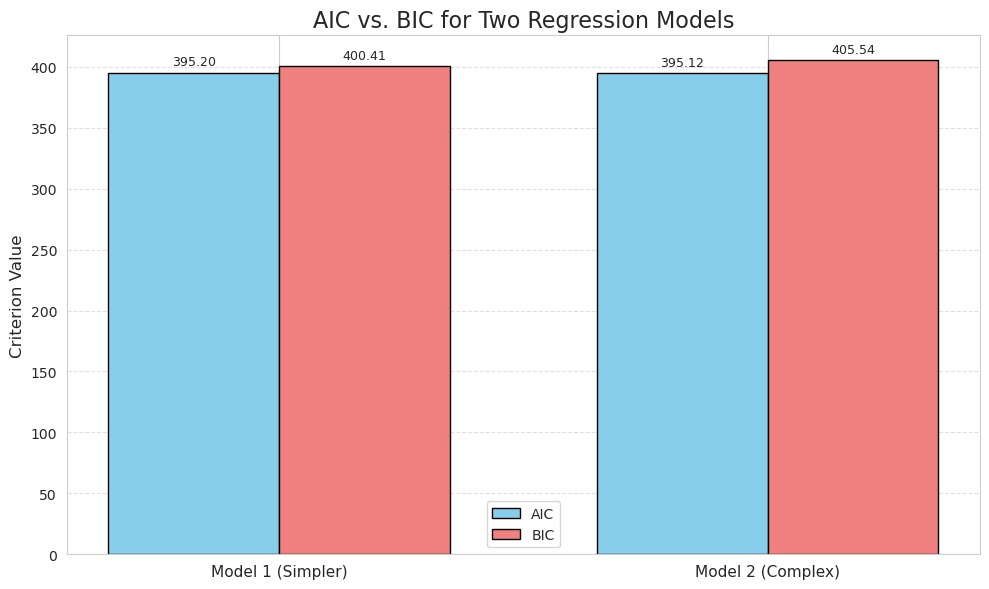


--- AIC/BIC from a real regression model (conceptual) ---
Full Model (3 predictors):
  AIC: 138.65
  BIC: 149.07

Simple Model (1 predictor):
  AIC: 194.00
  BIC: 199.21


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm # For convenient AIC/BIC access in real models

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("--- AIC and BIC Comparison Example ---")

# Data for problem statement
n = 100 # Number of observations

# Model 1: Sales ~ Online_Ads
k1 = 2 # Intercept + 1 predictor
SSE1 = 5000

# Model 2: Sales ~ Online_Ads + TV_Ads + Radio_Ads
k2 = 4 # Intercept + 3 predictors
SSE2 = 4800

# Calculate AIC
def calculate_aic(n, k, sse):
    return n * np.log(sse / n) + 2 * k

aic1 = calculate_aic(n, k1, SSE1)
aic2 = calculate_aic(n, k2, SSE2)

# Calculate BIC
def calculate_bic(n, k, sse):
    return n * np.log(sse / n) + k * np.log(n)

bic1 = calculate_bic(n, k1, SSE1)
bic2 = calculate_bic(n, k2, SSE2)

print(f"Model 1 (k={k1}, SSE={SSE1}):")
print(f"  AIC: {aic1:.2f}")
print(f"  BIC: {bic1:.2f}")

print(f"\nModel 2 (k={k2}, SSE={SSE2}):")
print(f"  AIC: {aic2:.2f}")
print(f"  BIC: {bic2:.2f}")

# --- Plotting AIC and BIC values ---
labels = ['Model 1 (Simpler)', 'Model 2 (Complex)']
aic_values = [aic1, aic2]
bic_values = [bic1, bic2]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, aic_values, width, label='AIC', color='skyblue', edgecolor='black')
rects2 = ax.bar(x + width/2, bic_values, width, label='BIC', color='lightcoral', edgecolor='black')

ax.set_ylabel('Criterion Value', fontsize=12)
ax.set_title('AIC vs. BIC for Two Regression Models', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.6)

def autolabel(rects, ax_obj):
    for rect in rects:
        height = rect.get_height()
        ax_obj.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1, ax)
autolabel(rects2, ax)

plt.tight_layout()
plt.show()

# Example using statsmodels (for real regression analysis)
print("\n--- AIC/BIC from a real regression model (conceptual) ---")
# Generate dummy data for illustration
np.random.seed(0)
X_dummy = np.random.rand(100, 3) # 3 predictors
y_dummy = X_dummy[:,0] * 2 + X_dummy[:,1] * 0.5 - X_dummy[:,2] * 1.5 + np.random.normal(0, 0.5, 100) + 10

# Add a constant for the intercept term for statsmodels
X_dummy_sm = sm.add_constant(X_dummy)

# Fit a full model (with 3 predictors)
model_full = sm.OLS(y_dummy, X_dummy_sm).fit()
print(f"Full Model (3 predictors):")
print(f"  AIC: {model_full.aic:.2f}")
print(f"  BIC: {model_full.bic:.2f}")

# Fit a simpler model (e.g., just first predictor)
X_simple_sm = sm.add_constant(X_dummy[:, 0])
model_simple = sm.OLS(y_dummy, X_simple_sm).fit()
print(f"\nSimple Model (1 predictor):")
print(f"  AIC: {model_simple.aic:.2f}")
print(f"  BIC: {model_simple.bic:.2f}")


**Interpretation of AIC/BIC Plot:**
The bar chart visually compares the AIC and BIC values for the two models. It immediately highlights that for AIC, Model 2 is slightly lower (preferred), while for BIC, Model 1 is significantly lower (preferred). This clearly illustrates how BIC penalizes complexity more aggressively due to its $\\ln(n)$ term, leading it to favor simpler models, especially with a reasonable number of observations ($n=100$ in this case).

-----

#### 7.3. Adjusted R²

**Explanation:**
$R^2$ (R-squared) is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where a higher value indicates a better fit.

However, a major limitation of standard $R^2$ is that it *always* increases or stays the same when you add more independent variables to a regression model, even if those variables are not truly related to the dependent variable. This can lead to overfitting and mislead you into thinking a more complex model is better.

**Adjusted R²** addresses this issue by penalizing the inclusion of unnecessary independent variables. It adjusts the $R^2$ based on the number of predictors in the model and the number of observations. It will only increase if the new term improves the model more than would be expected by chance. If a new predictor does not improve the model significantly, the Adjusted R² will decrease.

**Formula:**
$$\text{Adjusted } R^2 = 1 - \left[ \frac{(1 - R^2)(n - 1)}{n - k - 1} \right]$$
Where:

  * $R^2$ is the ordinary R-squared value.
  * $n$ is the number of observations (data points).
  * $k$ is the number of independent variables (predictors) in the model (excluding the intercept).

**Interpretation:**

  * When comparing models with different numbers of predictors, choose the model with the higher Adjusted R².
  * A higher Adjusted R² indicates that the model explains a higher proportion of variance with a meaningful number of predictors, avoiding the inflation issue of standard $R^2$.
  * Adjusted R² can be negative, especially for models with a very poor fit or too many predictors relative to the sample size.

-----

#### Example Problem Statement: Deciding on Adding Predictors to a Sales Model

A company is predicting sales ($Y$) based on advertising spend. They initially use `Online_Ads` as a predictor. They have 50 data points ($n=50$).

  * **Model A (Simple):** `Sales ~ Online_Ads`
      * $R^2 = 0.70$
      * $k\_A = 1$ (Online\_Ads)

Now, they are considering adding `Website_Traffic` as a second predictor.

  * **Model B (Complex):** `Sales ~ Online_Ads + Website_Traffic`
      * $R^2 = 0.72$
      * $k\_B = 2$ (Online\_Ads, Website\_Traffic)

Should they include `Website_Traffic` in the model? Evaluate using Adjusted R².

**Manual Calculation for Adjusted R²:**

**For Model A:**

  * $R^2\_A = 0.70$
  * $n = 50$
  * $k\_A = 1$

$$\text{Adjusted } R^2_A = 1 - \left[ \frac{(1 - 0.70)(50 - 1)}{50 - 1 - 1} \right]$$
$$\text{Adjusted } R^2_A = 1 - \left[ \frac{(0.30)(49)}{48} \right]$$
$$\text{Adjusted } R^2_A = 1 - \left[ \frac{14.7}{48} \right]$$
$$\text{Adjusted } R^2_A = 1 - 0.30625 = \mathbf{0.69375}$$

**For Model B:**

  * $R^2\_B = 0.72$
  * $n = 50$
  * $k\_B = 2$

$$\text{Adjusted } R^2_B = 1 - \left[ \frac{(1 - 0.72)(50 - 1)}{50 - 2 - 1} \right]$$
$$\text{Adjusted } R^2_B = 1 - \left[ \frac{(0.28)(49)}{47} \right]$$
$$\text{Adjusted } R^2_B = 1 - \left[ \frac{13.72}{47} \right]$$
$$\text{Adjusted } R^2_B = 1 - 0.2919 = \mathbf{0.7081}$$

**Comparison:**

  * Adjusted $R^2\_A = 0.69375$
  * Adjusted $R^2\_B = 0.7081$

Since Adjusted $R^2\_B$ (0.7081) is higher than Adjusted $R^2\_A$ (0.69375), it suggests that adding `Website_Traffic` as a predictor is beneficial, as it improved the model's explanatory power more than accounted for by the increased complexity.




**Python Code for Adjusted R² & Plot:**

--- Adjusted R-squared Example ---
Model A (k=1):
  R-squared: 0.7000
  Adjusted R-squared: 0.6937

Model B (k=2):
  R-squared: 0.7200
  Adjusted R-squared: 0.7081


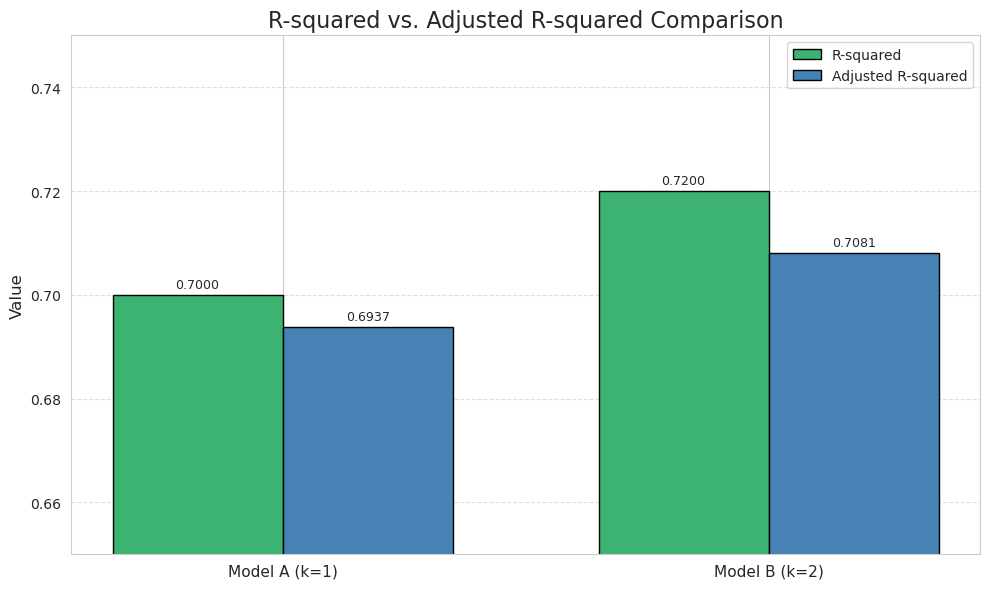


--- Conceptual Illustration: Adjusted R-squared behavior as predictors are added ---


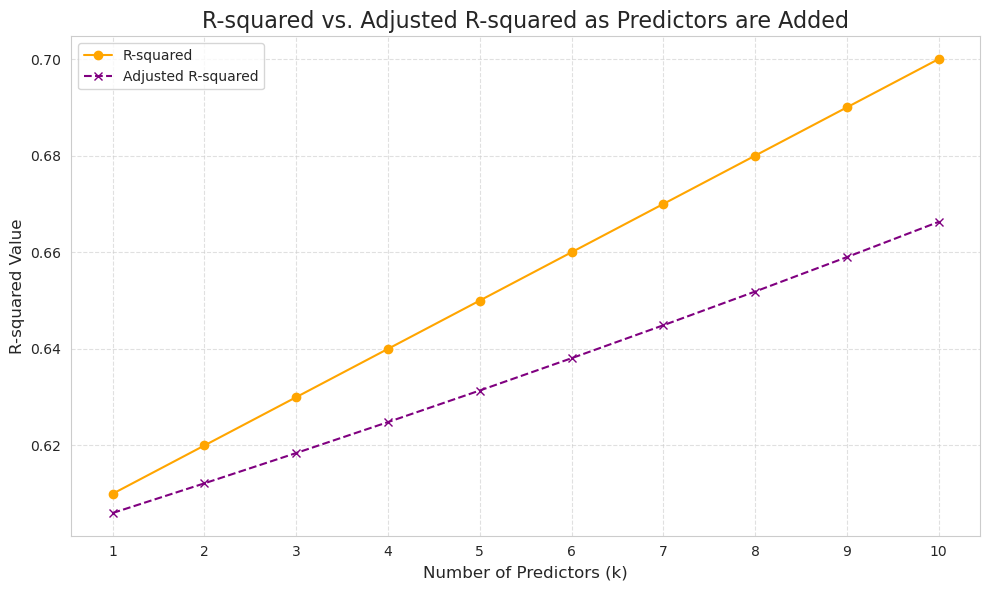

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("--- Adjusted R-squared Example ---")

# Function to calculate Adjusted R-squared
def calculate_adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Problem statement data
n_obs = 50

# Model A (Simple)
r2_A = 0.70
k_A = 1 # Number of predictors

adj_r2_A = calculate_adjusted_r2(r2_A, n_obs, k_A)

print(f"Model A (k={k_A}):")
print(f"  R-squared: {r2_A:.4f}")
print(f"  Adjusted R-squared: {adj_r2_A:.4f}")

# Model B (Complex)
r2_B = 0.72
k_B = 2 # Number of predictors

adj_r2_B = calculate_adjusted_r2(r2_B, n_obs, k_B)

print(f"\nModel B (k={k_B}):")
print(f"  R-squared: {r2_B:.4f}")
print(f"  Adjusted R-squared: {adj_r2_B:.4f}")

# --- Plotting R-squared vs. Adjusted R-squared ---
labels = ['Model A (k=1)', 'Model B (k=2)']
r2_values = [r2_A, r2_B]
adj_r2_values = [adj_r2_A, adj_r2_B]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, r2_values, width, label='R-squared', color='mediumseagreen', edgecolor='black')
rects2 = ax.bar(x + width/2, adj_r2_values, width, label='Adjusted R-squared', color='steelblue', edgecolor='black')

ax.set_ylabel('Value', fontsize=12)
ax.set_title('R-squared vs. Adjusted R-squared Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_ylim(0.65, 0.75) # Set y-limit to better show differences

def autolabel(rects, ax_obj):
    for rect in rects:
        height = rect.get_height()
        ax_obj.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1, ax)
autolabel(rects2, ax)

plt.tight_layout()
plt.show()

# Conceptual illustration of Adjusted R2 behavior
print("\n--- Conceptual Illustration: Adjusted R-squared behavior as predictors are added ---")
num_observations_ill = 100
true_r2 = 0.6
num_predictors = np.arange(1, 11) # 1 to 10 predictors
simulated_r2 = []
simulated_adj_r2 = []

# Simulate R2 increasing slightly with each predictor
# And calculate Adjusted R2 based on these simulated R2 and n, k
for k_val in num_predictors:
    # A simple way to simulate R2 increase, might not be perfectly linear in reality
    # But shows the concept
    r2_val = true_r2 + (k_val * 0.01) # R2 increases by 0.01 for each predictor
    if r2_val >= 1.0: r2_val = 0.99 # Cap at 0.99
    
    adj_r2_val = calculate_adjusted_r2(r2_val, num_observations_ill, k_val)
    
    simulated_r2.append(r2_val)
    simulated_adj_r2.append(adj_r2_val)

plt.figure(figsize=(10, 6))
plt.plot(num_predictors, simulated_r2, marker='o', linestyle='-', color='orange', label='R-squared')
plt.plot(num_predictors, simulated_adj_r2, marker='x', linestyle='--', color='purple', label='Adjusted R-squared')
plt.title('R-squared vs. Adjusted R-squared as Predictors are Added', fontsize=16)
plt.xlabel('Number of Predictors (k)', fontsize=12)
plt.ylabel('R-squared Value', fontsize=12)
plt.xticks(num_predictors)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



**Interpretation of Adjusted R² Plots:**

  * **Bar Plot:** This plot directly compares the R-squared and Adjusted R-squared for Model A and Model B. It visually demonstrates that while $R^2$ always increases when adding a predictor, Adjusted $R^2$ gives a more honest assessment, showing whether the increase in $R^2$ is truly worthwhile after accounting for model complexity.
  * **Line Plot (Conceptual):** This plot conceptually illustrates the key difference: $R^2$ generally always increases or stays flat as more predictors are added, while Adjusted $R^2$ can actually decrease if the new predictors do not significantly improve the model fit, thereby effectively penalizing unnecessary complexity. This makes Adjusted $R^2$ a better metric for comparing models of different complexities.
